# Imports and general setup

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Managing secrets
from google.colab import userdata

import gc # Garbage collector
import sys
from pathlib import Path
import os
import inspect # Access to source code


Mounted at /content/drive


In [3]:
# Working directory
%cd drive/MyDrive/GitHub/reportingAgent/PoC/
%pwd

/content/drive/MyDrive/GitHub/reportingAgent/PoC


'/content/drive/MyDrive/GitHub/reportingAgent/PoC'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
list_summary_files = ['/content/drive/MyDrive/DSTI_DL Project/05-PROD/results/Llama-3.2-1B-Instruct/an-mean-meta-llama-Llama-3.2-1B-Instruct-17-082025_06-51-03.xlsx',
                      '/content/drive/MyDrive/DSTI_DL Project/05-PROD/results/Llama-3.2-3B-Instruct/an-mean-meta-llama-Llama-3.2-3B-Instruct-17-082025_11-58-08.xlsx',
                      '/content/drive/MyDrive/DSTI_DL Project/05-PROD/results/Smol3B - tb and analysis/an-mean-HuggingFaceTB-SmolLM3-3B-17-082025_12-43-12.xlsx',
                      '/content/drive/MyDrive/DSTI_DL Project/05-PROD/results/phi-2/an-mean-tb-microsoft-phi-2-16-082025 02-50-43.xlsx',
                      '/content/drive/MyDrive/DSTI_DL Project/05-PROD/results/gpt2-xl/an-mean-openai-community-gpt2-xl-17-082025_21-34-31.xlsx']

In [6]:
all_data = pd.DataFrame()

for file_path in list_summary_files:
    excel_file = pd.ExcelFile(file_path)
    for sheet_name in excel_file.sheet_names:
        df = excel_file.parse(sheet_name)
        df['source_file'] = file_path
        df['source_sheet'] = sheet_name
        all_data = pd.concat([all_data, df], ignore_index=True)

# Create 'model_ID' based on 'source_file'
model_names = ['Llama-3.2-1B', 'Llama-3.2-3B', 'SmolLM3', 'phi-2', 'gpt2-xl']
all_data['model_ID'] = all_data['source_file'].apply(lambda x: next((name for name in model_names if name in x), None))

# Create 'prompt_method' based on 'source_sheet'
all_data['prompt_method'] = all_data['source_sheet'].str.extract(r'([ABC])')

display(all_data.head())

,Unnamed: 0,temperature,top_p,top_k,max_new_tokens,do_sample,repetition_penalty,bs_precision,bs_recall,bs_f1,...,rouge2,rougeL,rougeLsum,bleu,b_1_grams,b_2_grams,b_3_grams,b_4_grams,model_ID,prompt_method
0,0,0.3,0.3,50,300,True,1,0.854371,0.849928,0.851665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Llama-3.2-1B,B
1,1,0.3,0.6,50,300,True,1,0.860664,0.857600,0.858593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Llama-3.2-1B,B
2,2,0.3,0.9,50,300,True,1,0.860444,0.855129,0.857317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Llama-3.2-1B,B
3,3,0.7,0.3,50,300,True,1,0.856441,0.853015,0.854233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Llama-3.2-1B,B
4,4,0.7,0.6,50,300,True,1,0.849492,0.841696,0.844928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Llama-3.2-1B,B


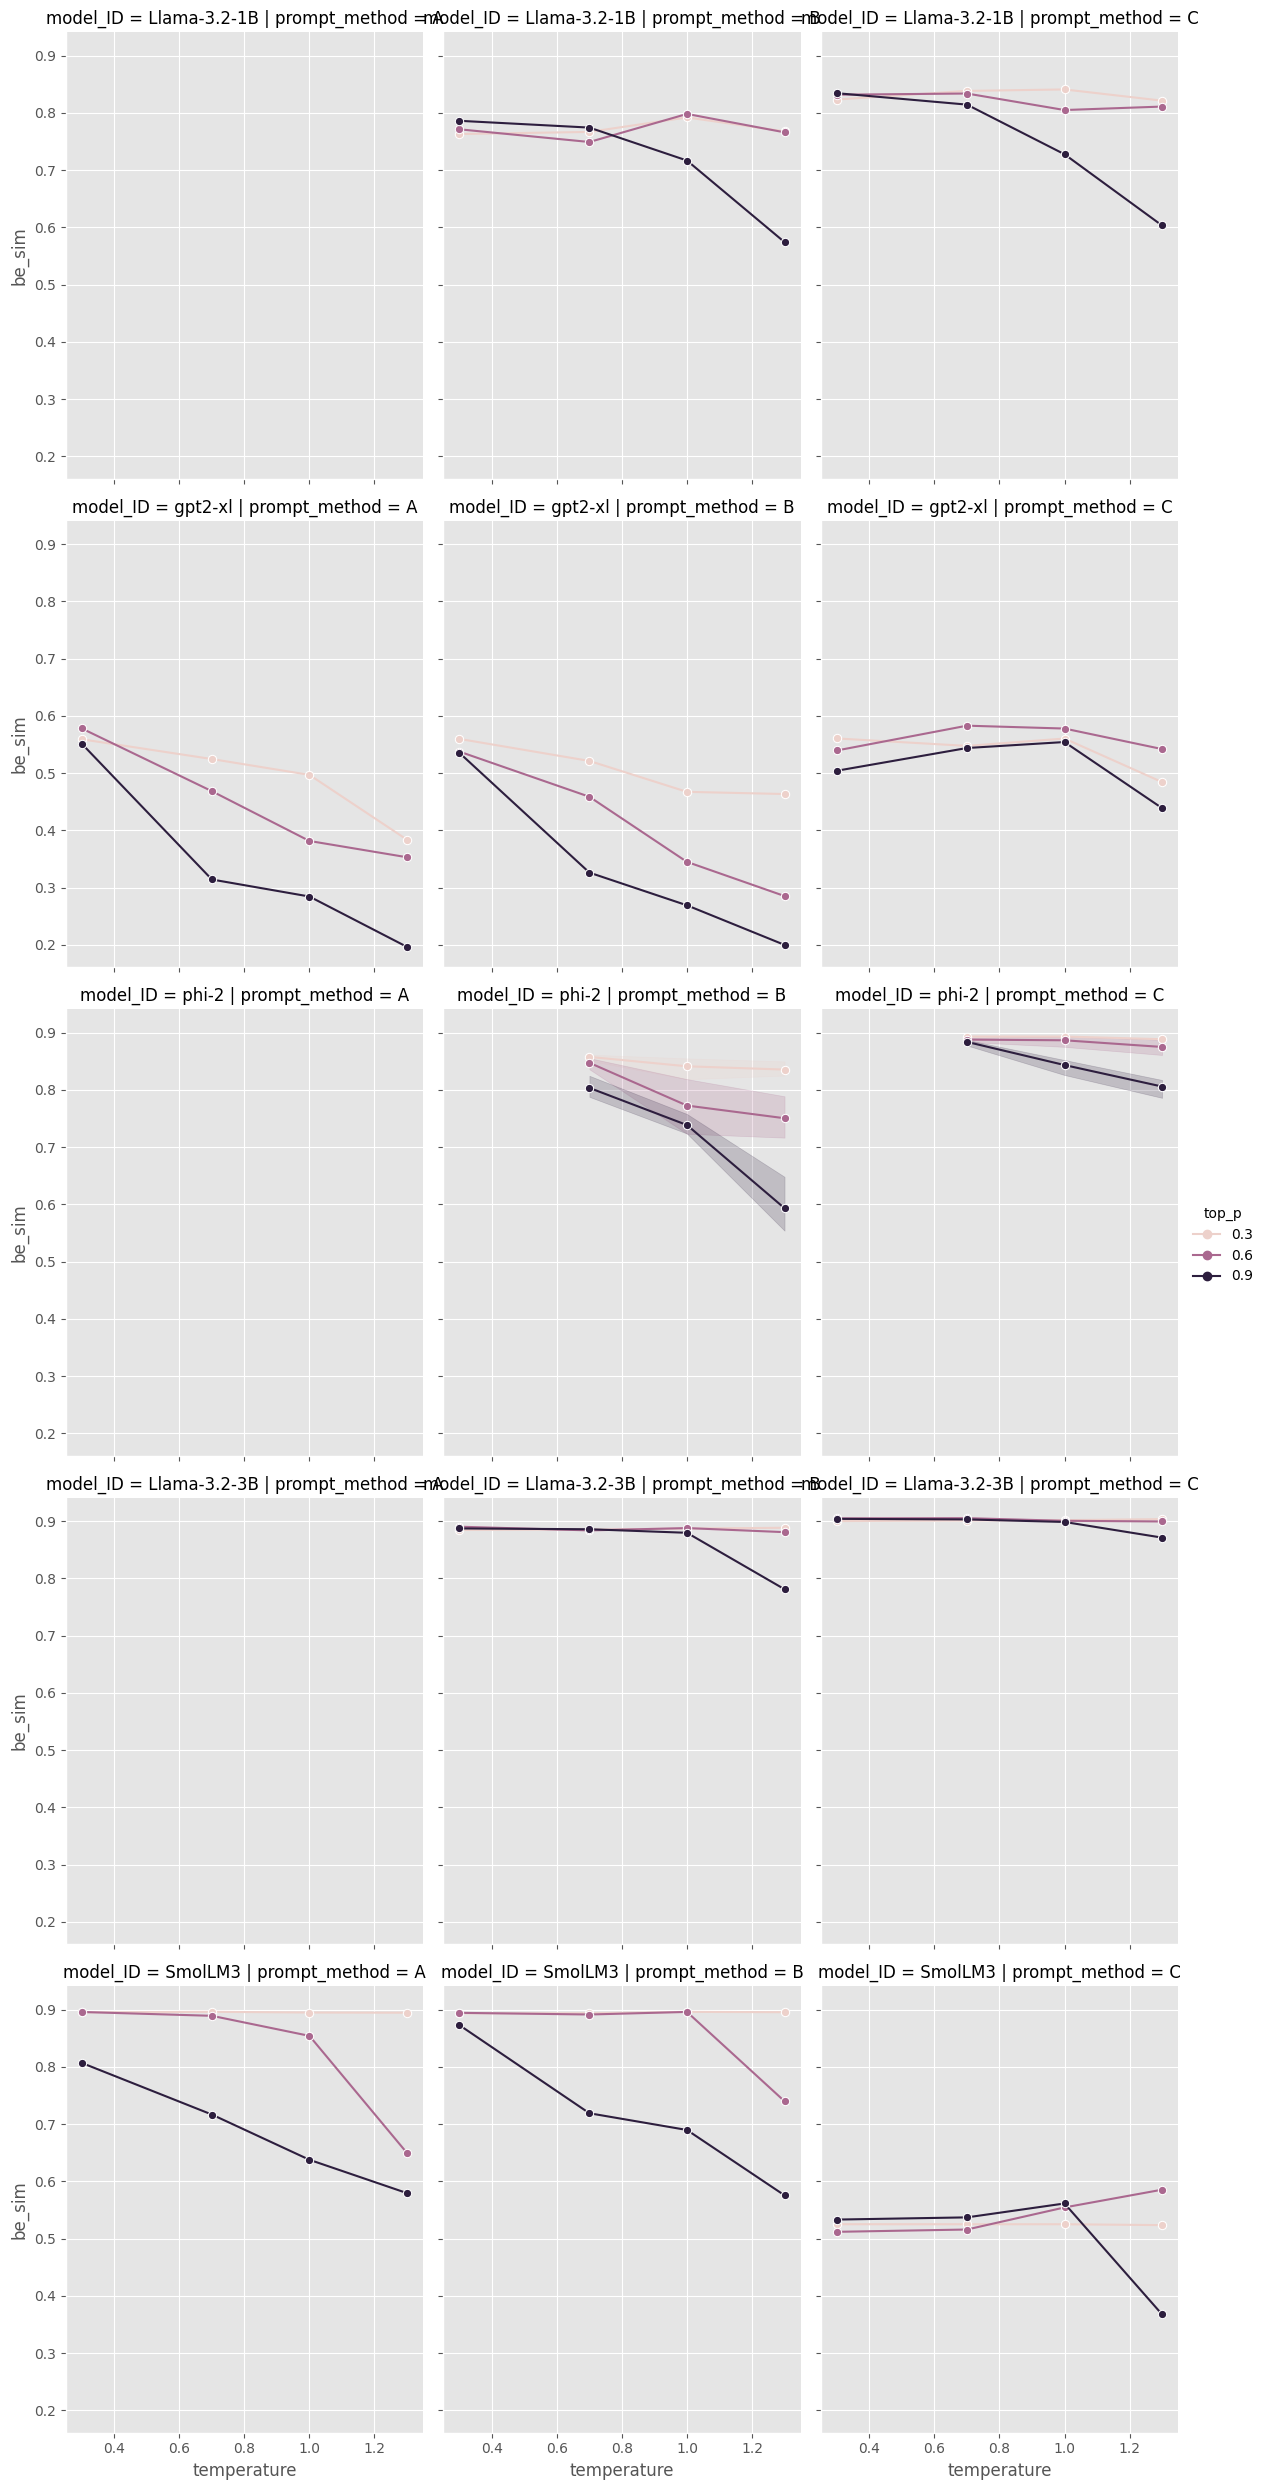

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

sns.relplot(data=all_data, x='temperature', y='be_sim', kind='line',
            hue='top_p', row='model_ID', col='prompt_method',
            col_order=['A', 'B', 'C'],
            row_order=['Llama-3.2-1B', 'gpt2-xl', 'phi-2', 'Llama-3.2-3B', 'SmolLM3'],
            height=5, aspect=0.8, marker='o')

plt.show()